In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:

from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    
    df_copy = df.copy()
    df_copy.drop('Time',axis=1, inplace = True)
    return df_copy

In [7]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 dataframedml 사전 데이터 가공이 완료된 복사 dataframe 반환
    df_copy = get_preprocessed_df(df)
    
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    
    #train_train_test_split()으로 학습과 테스트 데이터 분할
    # stratify : 타겟 값의 분포도에 맞춰 학습과 테스트 맞춰서 반훌
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [9]:
# 학습/테스트 데이터 레이블 비율
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [11]:
# LogisticRegression 알고리즘 적용하여 학습/예측/평가 수행

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)

lr_pred = lr_clf.predict(X_test)


In [13]:
# 모델을 학습 / 예측/평가를 위한 함수 생성
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,-1]

In [14]:
from lightgbm import LGBMClassifier

#boost_from_average : 에러까지는 아닌데

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                    tgt_train = y_train, tgt_test=y_test)

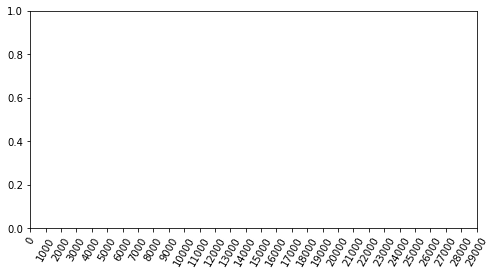

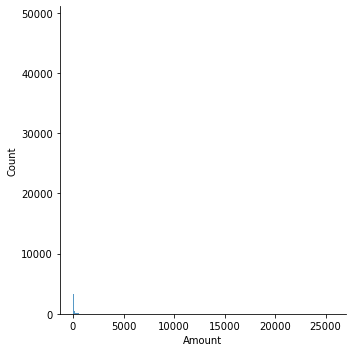

In [18]:
# 중요 속성으로 Amount 선정해서 분포토 확인

import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.displot(card_df['Amount'])

In [22]:
# 전처리 함수 get_preprocessed_df()수정

from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
    
    # 변환된 Amount를 Amount_scaled로 피처명 변경후 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled',amount_n)
    
    df_copy.drop(['Time','Amount'],axis=1, inplace=True)
    return df_copy

In [25]:
card_df2 = get_preprocessed_df(card_df)
card_df2.head()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [29]:
print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64,
                          n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, 
                     tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
### LightGBM 예측 성능 ###


In [27]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

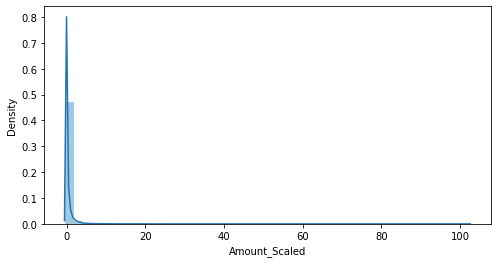

In [30]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.distplot(card_df2['Amount_Scaled'])

In [31]:
# ### 전처리 함수 ③ : get_preprocessed_df() 수정
# - 비대칭 분포를 갖는 Amount 피처를 로그 변환

# In[24]:


def get_preprocessed_df(df=None):
    df_copy = df.copy()
    
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    
    # 넘파이의 로그 변환 함수는 np.log()인데
    # 보통 로그 변환할 때 log() 잘 안쓰고 log1p() 사용
    # 1p가 원 플러스로 하나를 더하겠다는 의미
    
    # Amount_Scaled 칼럼 추가하고 'Time','Amount' 삭제
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy


In [32]:
# log1p 와 expm1 설명 
import numpy as np

# log(-1000)은 0 인데
print(1e-1000 == 0.0)

# log() 사용하면 -inf가 나옴
print(np.log(1e-1000)) 
# log() 사용 시 문제 : 

# log()에 1을 더하면 0이 됨
print(np.log(1e-1000 + 1))

# 그래서 1을 더한 log1p() 사용 : 0이 됨
print(np.log1p(1e-1000))

True
-inf
0.0
0.0


In [33]:
# log1p() 한 값을 원래 값으로 되돌릴 때는 expm1() 시용
# expm1() : 1을 뺀다는 의미
var_1 = np.log1p(100)
var_2 = np.expm1(var_1) 
print(var_1, var_2)


# ---

4.61512051684126 100.00000000000003


In [34]:
# **Ammount 피처 로그 변환한 뒤 로지스틱회귀, LightGBM 학습/예측/평가**

# In[25]:


# 학습/테스트 데이터 분리하고
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

# 예측 성능 확인
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


#     => Amount 피처 로그변환하지 않은 데이터로 학습한 경우보다 약간씩 성능이 개선됨



### 로지스틱 회귀 예측 성능 ###
### LightGBM 예측 성능 ###


<AxesSubplot:xlabel='Amount_Scaled', ylabel='Density'>

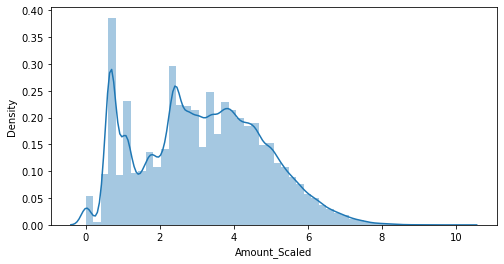

In [35]:
import seaborn as sns

card_df2 = get_preprocessed_df(card_df)
plt.figure(figsize=(8, 4))
sns.distplot(card_df2['Amount_Scaled'])



<AxesSubplot:>

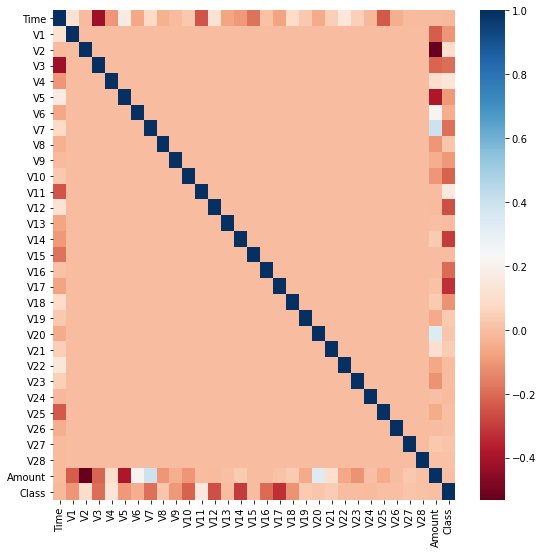

In [36]:
 ## 이상치 데이터 제거 후 모델 학습/예측/평가

# ### 각 피처들의 상관 관계 시각화 : 히트맵(heatmap)
# - 결정 레이블인 class 값과 가장 상관도가 높은 피처 추출
# 
# 
# - 추출한 다음 이 중에 상관도가 높은 피처들에 대해서 아웃 라이어 찾음
# 
# 
# - 그 다음에 거기에 대한 아웃 라이어가 높은 피처들을 가지고 있는 레코드 삭제

# In[27]:


import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr() # 각 칼럼들의 상관도 값 반환
sns.heatmap(corr, cmap='RdBu') 



In [37]:
# 아웃라이어를 찾기 위한 함수 새로 생성

import numpy as np

# weight는 boxplot에서 이상치 계산시 1.5*IQR(몸통)을 더하고, 뺀 값들이 이상치
# 전체 데이터에서 찾지 않고 사기 데이터 (Class가 1인)에서 찾음
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column] # column 값으로 V14 들어올 것임
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25

    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 데이터 프레임 인덱스 찾음
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index

In [38]:
np.percentile(card_df['V14'], 25) # 1분위수

-0.4255740124549935

In [39]:
np.percentile(card_df['V14'], 75) # 3분위수 : 상위 75%

0.493149849218149

In [40]:

#np.percentile(card_df['V14'].values, 100) 
np.max(card_df['V14'])



10.5267660517847

In [41]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)
# 4개 인덱스 : 이 인덱스에 해당되는 행은 삭제할 것임

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


<AxesSubplot:xlabel='V14', ylabel='Density'>

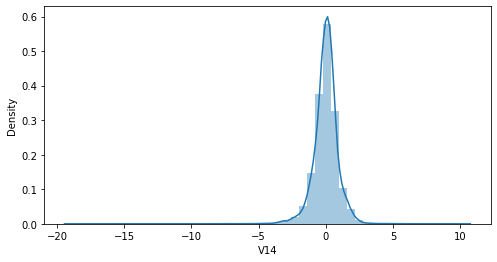

In [42]:
plt.figure(figsize=(8, 4))
sns.distplot(card_df['V14'])

In [43]:
# 이상치 데이터 삭제하는 로직 추가

# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True) # axis=0 : 행 삭제
    return df_copy



In [44]:
# ### 로그변환, 이상치 제거 후 모델들을 재 학습/예측/평가

# In[38]:


X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


#     => 이상치 제거 후 로지스틱 회귀와 LightGBM 모두 예측 성능이 크게 향상됨

# ## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

### 로지스틱 회귀 예측 성능 ###
### LightGBM 예측 성능 ###


In [45]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=0) 

# train 데이터 세트로 들어오는 값들에 대해서 오버샘플링 시작
# 타겟값의 분포에 맞춰 피처값 생성

# 교재 smote.fit_sample()의 경우 : 'SMOTE' object has no attribute 'fit_sample' 오류 메시지발생
# smote.fit_resample()로 변경

X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 전체 데이터 : 284,807 
# 테스트 : 30 %, train : 70 %
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())


SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64
